https://www.kaggle.com/fernandol/countries-of-the-world/data

In [1]:
# Import statements! Are loans given to people who actually need it, 3 more files, contain poverty index of every country
from functools import reduce
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, Imputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [2]:
loans = pd.read_csv("data-science-for-good-kiva-crowdfunding/kiva_loans.csv")
mpi_locations = pd.read_csv("data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv")
world_countries = pd.read_csv("data-science-for-good-kiva-crowdfunding/countries of the world.csv", thousands = '.')

# First let's do all the data work with world_countries data set

In [3]:
world_countries["Country"] = world_countries["Country"].str.strip()

In [4]:
world_countries.loc[world_countries["Country"] == 'Albania']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"


In [5]:
world_countries = world_countries.fillna('0') # It's not the best solution but we must do this to work with the comma separated values

In [6]:
for k in range(0, len(world_countries)):
    
    world_countries["Coastline (coast/area ratio)"][k] = world_countries["Coastline (coast/area ratio)"][k].replace(',','.')
    world_countries["Net migration"][k] = world_countries["Net migration"][k].replace(',','.')
    world_countries["Infant mortality (per 1000 births)"][k] = world_countries["Infant mortality (per 1000 births)"][k].replace(',','.')
    world_countries["Literacy (%)"][k] = world_countries["Literacy (%)"][k].replace(',','.')
    world_countries["Phones (per 1000)"][k] = world_countries["Phones (per 1000)"][k].replace(',','.')
    world_countries["Arable (%)"][k] = world_countries["Arable (%)"][k].replace(',','.')
    world_countries["Crops (%)"][k] = world_countries["Crops (%)"][k].replace(',','.')
    world_countries["Other (%)"][k] = world_countries["Other (%)"][k].replace(',','.')
    world_countries["Birthrate"][k] = world_countries["Birthrate"][k].replace(',','.')
    world_countries["Deathrate"][k] = world_countries["Deathrate"][k].replace(',','.')
    world_countries["Agriculture"][k] = world_countries["Agriculture"][k].replace(',','.')
    world_countries["Industry"][k] = world_countries["Industry"][k].replace(',','.')
    world_countries["Service"][k] = world_countries["Service"][k].replace(',','.')
    world_countries["Pop. Density (per sq. mi.)"][k] = world_countries["Pop. Density (per sq. mi.)"][k].replace(',','.')



/home/shelob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shelob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/shelob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/h

In [7]:
world_countries_revise = pd.DataFrame.copy(world_countries)

In [8]:
world_countries_revise["Coastline (coast/area ratio)"] = pd.to_numeric(world_countries["Coastline (coast/area ratio)"])
world_countries_revise["Infant mortality (per 1000 births)"] = pd.to_numeric(world_countries["Infant mortality (per 1000 births)"])
world_countries_revise["Literacy (%)"] = pd.to_numeric(world_countries["Literacy (%)"])
world_countries_revise["Phones (per 1000)"] = pd.to_numeric(world_countries["Phones (per 1000)"])
world_countries_revise["Arable (%)"] = pd.to_numeric(world_countries["Arable (%)"])
world_countries_revise["Crops (%)"] = pd.to_numeric(world_countries["Crops (%)"])
world_countries_revise["Other (%)"] = pd.to_numeric(world_countries["Other (%)"])
world_countries_revise["Net migration"] = pd.to_numeric(world_countries["Net migration"])
world_countries_revise["Birthrate"] = pd.to_numeric(world_countries["Birthrate"])
world_countries_revise["Deathrate"] = pd.to_numeric(world_countries["Deathrate"])
world_countries_revise["Agriculture"] = pd.to_numeric(world_countries["Agriculture"])
world_countries_revise["Industry"] = pd.to_numeric(world_countries["Industry"])
world_countries_revise["Service"] = pd.to_numeric(world_countries["Service"])
world_countries_revise["Pop. Density (per sq. mi.)"] = pd.to_numeric(world_countries["Pop. Density (per sq. mi.)"])

In [9]:
mpi_locations.head(5)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [10]:
# world_countries["Country"].value_counts()

In [11]:
# world_countries["Country"] = world_countries["Country"].str.lower()

In [12]:
# world_countries = world_countries.rename(columns = {'Country' : 'country_x'})

In [13]:
loans.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01


In [14]:
world_countries.head(1)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38


In [15]:
loans_no_nan = loans[pd.notnull(loans['region'])]

In [16]:
loans_merge = pd.merge(loans_no_nan, mpi_locations, on = 'region')

In [17]:
# loans_merge = loans_merge.rename(columns = {"country_x" : "Country"})

In [18]:
# loans_merge["Country"].value_counts()

In [19]:
# world_countries.info()

In [20]:
# loans_merge.head(5)

In [21]:
# world_countries = world_countries.drop("Region", 1)

In [22]:
# loans_merge_world = pd.merge(left = loans_merge, right = world_countries, left_on = 'country_x', right_on = 'Country')

In [23]:
# loans_merge_world.info()

In [24]:
# loans_merge_world.head(2000)

In [25]:
# loans_merge_world

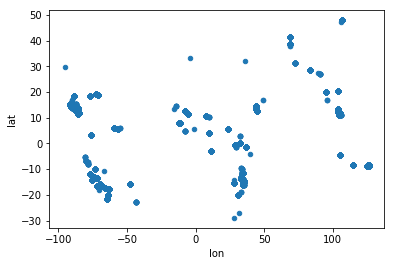

In [26]:
loans_merge.plot(kind = "scatter", x="lon", y="lat")
plt.show()

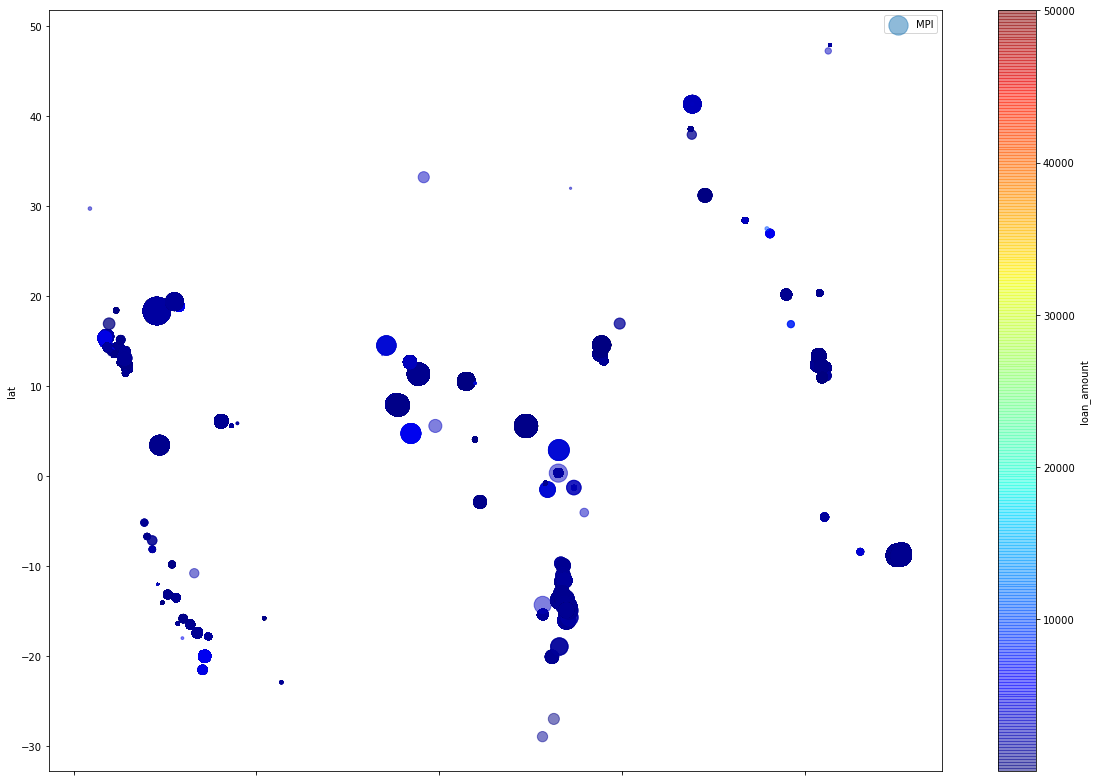

In [27]:
loans_merge.plot(kind = "scatter", x="lon", y="lat", alpha = .5,
                  s = loans_merge["MPI"] * 1000 , label = "MPI", figsize = (20, 14),
                  c = "loan_amount", cmap = plt.get_cmap("jet"), colorbar = True,
                  )
plt.legend()
plt.show()

In [28]:
copy = pd.DataFrame.copy(loans_merge)

In [29]:
copy = copy.drop("geo", 1)
copy = copy.drop("country_code", 1)
copy = copy.drop("use", 1)
copy = copy.drop("partner_id", 1)
copy = copy.drop("disbursed_time", 1)
copy = copy.drop("funded_time", 1)
copy = copy.drop("date", 1)
# copy = copy.drop("country_x", 1)
copy = copy.drop("tags", 1)
copy = copy.drop("ISO", 1)
copy = copy.drop("country_y", 1)
copy = copy.drop("world_region", 1)
copy = copy.drop("posted_time", 1)
copy = copy.drop("id", 1)

In [30]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60158 entries, 0 to 60157
Data columns (total 15 columns):
funded_amount         60158 non-null float64
loan_amount           60158 non-null float64
activity              60158 non-null object
sector                60158 non-null object
country_x             60158 non-null object
region                60158 non-null object
currency              60158 non-null object
term_in_months        60158 non-null float64
lender_count          60158 non-null int64
borrower_genders      60158 non-null object
repayment_interval    60158 non-null object
LocationName          60158 non-null object
MPI                   60158 non-null float64
lat                   60075 non-null float64
lon                   60075 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 7.3+ MB


In [31]:
copy.head()

,funded_amount,loan_amount,activity,sector,country_x,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval,LocationName,MPI,lat,lon
0,600.0,600.0,Machinery Rental,Services,Nicaragua,Leon,NIO,14.0,16,female,monthly,"Leon, Nicaragua",0.031,28.399855,83.689569
1,1000.0,1000.0,Grocery Store,Food,Nicaragua,Leon,NIO,14.0,20,male,monthly,"Leon, Nicaragua",0.031,28.399855,83.689569
2,250.0,250.0,Fuel/Firewood,Retail,Nicaragua,Leon,NIO,14.0,8,female,monthly,"Leon, Nicaragua",0.031,28.399855,83.689569
3,175.0,175.0,Food Market,Food,Nicaragua,Leon,NIO,14.0,5,female,monthly,"Leon, Nicaragua",0.031,28.399855,83.689569
4,800.0,800.0,Clothing Sales,Clothing,Nicaragua,Leon,NIO,9.0,7,"female, female, female",monthly,"Leon, Nicaragua",0.031,28.399855,83.689569


In [32]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60158 entries, 0 to 60157
Data columns (total 15 columns):
funded_amount         60158 non-null float64
loan_amount           60158 non-null float64
activity              60158 non-null object
sector                60158 non-null object
country_x             60158 non-null object
region                60158 non-null object
currency              60158 non-null object
term_in_months        60158 non-null float64
lender_count          60158 non-null int64
borrower_genders      60158 non-null object
repayment_interval    60158 non-null object
LocationName          60158 non-null object
MPI                   60158 non-null float64
lat                   60075 non-null float64
lon                   60075 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 7.3+ MB


In [33]:
copy_2 = pd.merge(copy, world_countries_revise, left_on = "country_x", right_on = "Country")

In [34]:
copy_2.loc[copy_2["country_x"] == "El Salvador"]

,funded_amount,loan_amount,activity,sector,country_x,region,currency,term_in_months,lender_count,borrower_genders,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
35034,1500.0,1500.0,Home Energy,Personal Use,El Salvador,San Miguel,USD,20.0,60,female,...,142.4,31.85,12.07,56.08,2,26.61,5.78,0.099,0.302,0.599
35035,700.0,700.0,Farming,Agriculture,El Salvador,San Miguel,USD,14.0,20,female,...,142.4,31.85,12.07,56.08,2,26.61,5.78,0.099,0.302,0.599
35036,1300.0,1300.0,Higher education costs,Education,El Salvador,San Miguel,USD,27.0,43,female,...,142.4,31.85,12.07,56.08,2,26.61,5.78,0.099,0.302,0.599
35037,700.0,700.0,Food Market,Food,El Salvador,San Miguel,USD,20.0,20,male,...,142.4,31.85,12.07,56.08,2,26.61,5.78,0.099,0.302,0.599
35038,1000.0,1000.0,Construction,Construction,El Salvador,San Miguel,USD,14.0,17,male,...,142.4,31.85,12.07,56.08,2,26.61,5.78,0.099,0.302,0.599
35039,1000.0,1000.0,General Store,Retail,El Salvador,San Miguel,USD,20.0,30,female,...,142.4,31.85,12.07,56.08,2,26.61,5.78,0.099,0.302,0.599
35040,700.0,1000.0,Personal Housing Expenses,Housing,El Salvador,San Miguel,USD,14.0,25,female,...,142.4,31.85,12.07,56.08,2,26.61,5.78,0.099,0.302,0.599
35041,700.0,700.0,Agriculture,Agriculture,El Salvador,San Miguel,USD,14.0,25,female,...,142.4,31.85,12.07,56.08,2,26.61,5.78,0.099,0.302,0.599
35042,700.0,700.0,Vehicle,Personal Use,El Salvador,San Miguel,USD,14.0,18,male,...,142.4,31.85,12.07,56.08,2,26.61,5.78,0.099,0.302,0.599
35043,1100.0,1100.0,Personal Housing Expenses,Housing,El Salvador,San Miguel,USD,26.0,38,female,...,142.4,31.85,12.07,56.08,2,26.61,5.78,0.099,0.302,0.599


In [56]:
copy_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59030 entries, 0 to 59029
Data columns (total 32 columns):
funded_amount                         59030 non-null float64
loan_amount                           59030 non-null float64
activity                              59030 non-null object
sector                                59030 non-null object
country_x                             59030 non-null object
region                                59030 non-null object
term_in_months                        59030 non-null float64
lender_count                          59030 non-null int64
borrower_genders                      59030 non-null object
repayment_interval                    59030 non-null object
LocationName                          59030 non-null object
MPI                                   59030 non-null float64
lat                                   58947 non-null float64
lon                                   58947 non-null float64
Population                            59030 no

In [47]:
copy_2["Climate"].value_counts() # We can encode this one

2      33454
1,5    24080
1       1268
3        147
0         81
Name: Climate, dtype: int64

In [49]:
copy_2 = copy_2.drop("Country", 1)

In [52]:
copy_2 = copy_2.drop("Region", 1)

In [55]:
copy_2 = copy_2.drop("currency", 1)

In [57]:
copy_2 = copy_2.drop("LocationName", 1)

In [53]:
copy_2["GDP ($ per capita)"] = pd.to_numeric(copy_2["GDP ($ per capita)"])

In [48]:
encoder = LabelEncoder()

In [58]:
sector_cat = copy_2["sector"]
activity_cat = copy_2["activity"]
country_cat = copy_2["country_x"]
region_cat = copy_2["region"]
gender_cat = copy_2["borrower_genders"]
repay_cat = copy_2["repayment_interval"]
climate_cat = copy_2["Climate"]

In [59]:
region_cat = region_cat.fillna('Other Region')
gender_cat = gender_cat.fillna('Other Gender')

In [60]:
sector_encode = encoder.fit_transform(sector_cat)
activity_encode = encoder.fit_transform(activity_cat)
region_encode = encoder.fit_transform(region_cat)
gender_encode = encoder.fit_transform(gender_cat)
repay_encode = encoder.fit_transform(repay_cat)
climate_encode = encoder.fit_transform(climate_cat)
country_encode = encoder.fit_transform(country_cat)

In [61]:
copy_2["sector"] = sector_encode
copy_2["activity"] = activity_encode
copy_2["region"] = region_encode
copy_2["borrower_genders"] = gender_encode
copy_2["repayment_interval"] = repay_encode
copy_2["Climate"] = climate_encode
copy_2["country_x"] = country_encode

In [62]:
copy_2.head()

,funded_amount,loan_amount,activity,sector,country_x,region,term_in_months,lender_count,borrower_genders,repayment_interval,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,600.0,600.0,85,12,23,57,14.0,16,0,2,...,39.7,15.94,1.94,82.12,3,24.51,4.45,0.165,0.275,0.56
1,1000.0,1000.0,70,6,23,57,14.0,20,618,2,...,39.7,15.94,1.94,82.12,3,24.51,4.45,0.165,0.275,0.56
2,250.0,250.0,64,11,23,57,14.0,8,0,2,...,39.7,15.94,1.94,82.12,3,24.51,4.45,0.165,0.275,0.56
3,175.0,175.0,60,6,23,57,14.0,5,0,2,...,39.7,15.94,1.94,82.12,3,24.51,4.45,0.165,0.275,0.56
4,800.0,800.0,31,2,23,57,9.0,7,2,2,...,39.7,15.94,1.94,82.12,3,24.51,4.45,0.165,0.275,0.56


In [63]:
imputer = Imputer(strategy = "median")

In [64]:
imputer.fit(copy_2)
X = imputer.transform(copy_2)
transform_world = pd.DataFrame(X, columns = copy_2.columns)
transform_world

,funded_amount,loan_amount,activity,sector,country_x,region,term_in_months,lender_count,borrower_genders,repayment_interval,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,600.0,600.0,85.0,12.0,23.0,57.0,14.0,16.0,0.0,2.0,...,39.7,15.94,1.94,82.12,3.0,24.51,4.45,0.165,0.275,0.560
1,1000.0,1000.0,70.0,6.0,23.0,57.0,14.0,20.0,618.0,2.0,...,39.7,15.94,1.94,82.12,3.0,24.51,4.45,0.165,0.275,0.560
2,250.0,250.0,64.0,11.0,23.0,57.0,14.0,8.0,0.0,2.0,...,39.7,15.94,1.94,82.12,3.0,24.51,4.45,0.165,0.275,0.560
3,175.0,175.0,60.0,6.0,23.0,57.0,14.0,5.0,0.0,2.0,...,39.7,15.94,1.94,82.12,3.0,24.51,4.45,0.165,0.275,0.560
4,800.0,800.0,31.0,2.0,23.0,57.0,9.0,7.0,2.0,2.0,...,39.7,15.94,1.94,82.12,3.0,24.51,4.45,0.165,0.275,0.560
5,800.0,800.0,70.0,6.0,23.0,57.0,13.0,31.0,0.0,2.0,...,39.7,15.94,1.94,82.12,3.0,24.51,4.45,0.165,0.275,0.560
6,400.0,400.0,31.0,2.0,23.0,57.0,13.0,14.0,0.0,2.0,...,39.7,15.94,1.94,82.12,3.0,24.51,4.45,0.165,0.275,0.560
7,1925.0,1925.0,70.0,6.0,23.0,57.0,10.0,60.0,8.0,1.0,...,39.7,15.94,1.94,82.12,3.0,24.51,4.45,0.165,0.275,0.560
8,250.0,250.0,31.0,2.0,23.0,57.0,10.0,9.0,0.0,2.0,...,39.7,15.94,1.94,82.12,3.0,24.51,4.45,0.165,0.275,0.560
9,800.0,800.0,70.0,6.0,23.0,57.0,17.0,27.0,0.0,2.0,...,39.7,15.94,1.94,82.12,3.0,24.51,4.45,0.165,0.275,0.560


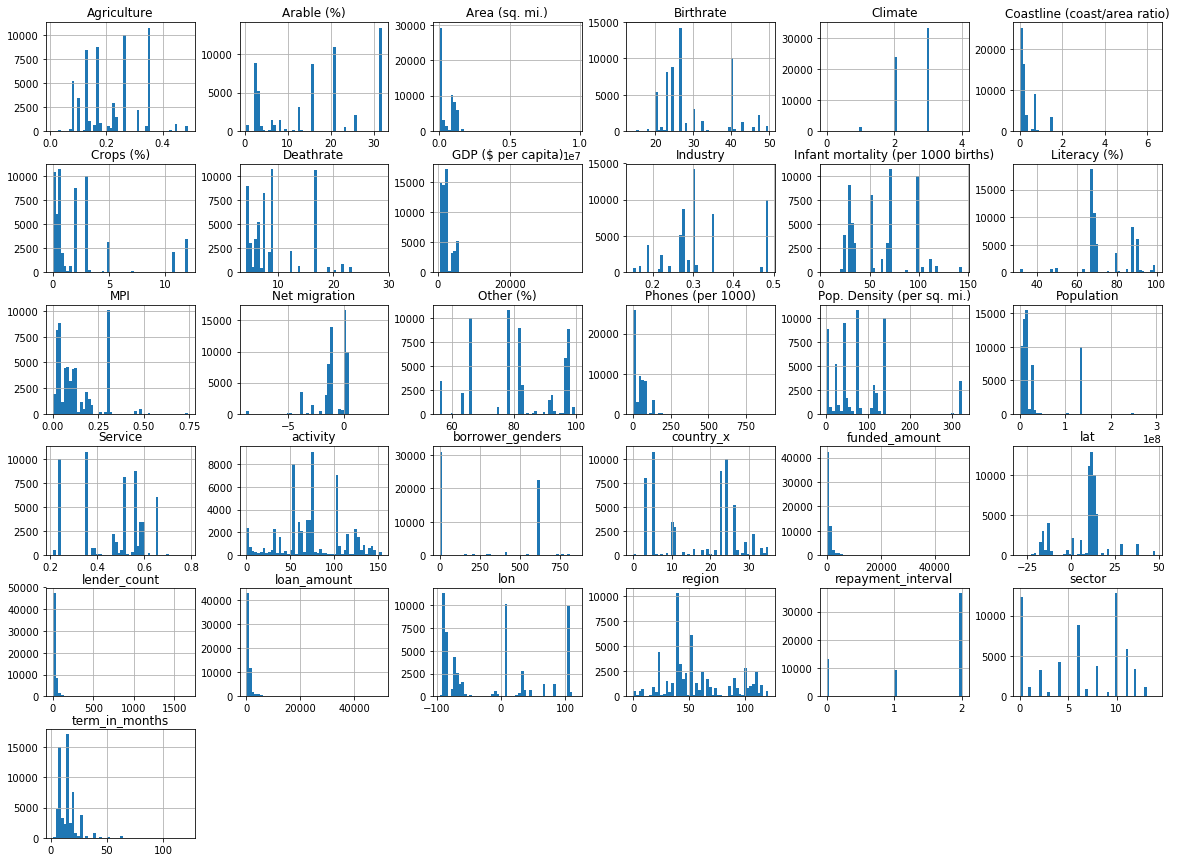

In [65]:
%matplotlib inline
transform_world.hist(bins = 50, figsize = (20, 15))
plt.show()

In [66]:
correlation_matrix = transform_world.corr()

In [67]:
correlation_matrix["sector"].sort_values(ascending = False)

sector                                1.000000
activity                              0.499742
repayment_interval                    0.387895
Other (%)                             0.222124
lon                                   0.146219
Agriculture                           0.105853
Climate                               0.103238
Net migration                         0.088386
Service                               0.046472
region                                0.046272
Literacy (%)                          0.040107
loan_amount                          -0.013590
lat                                  -0.013731
funded_amount                        -0.016765
GDP ($ per capita)                   -0.020715
Infant mortality (per 1000 births)   -0.031044
lender_count                         -0.031101
Area (sq. mi.)                       -0.078907
Coastline (coast/area ratio)         -0.103072
Phones (per 1000)                    -0.115013
borrower_genders                     -0.129006
Deathrate    

In [68]:
correlation_matrix["country_x"].sort_values(ascending = False)

country_x                             1.000000
Birthrate                             0.435811
Population                            0.367095
Deathrate                             0.326745
Infant mortality (per 1000 births)    0.142501
MPI                                   0.139156
Net migration                         0.133263
Crops (%)                             0.125804
Arable (%)                            0.115387
Industry                              0.096588
Area (sq. mi.)                        0.095577
borrower_genders                      0.068736
lat                                   0.059290
Service                               0.015827
funded_amount                         0.015580
Pop. Density (per sq. mi.)            0.014513
lon                                   0.007058
loan_amount                           0.005520
activity                             -0.004202
lender_count                         -0.029761
Coastline (coast/area ratio)         -0.042226
term_in_month

# Now let's experiement with some classification techniques!

In [70]:
train_set, test_set = train_test_split(transform_world, test_size = 0.2, random_state = 42)

In [71]:
y_train = train_set["sector"]
y_test = test_set["sector"]
x_test = test_set.drop("sector", 1)
x_train = train_set.drop("sector", 1)

In [72]:
dt_clf = DecisionTreeClassifier(random_state = 42)

In [73]:
dt_clf.fit(x_train, y_train)
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [74]:
dt_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

In [75]:
cross_val_score(dt_clf, x_train, y_train, cv = 3, scoring = "accuracy")

array([0.9963798 , 0.9959347 , 0.99497966])

In [76]:
y_train_predict_dt = cross_val_predict(dt_clf, x_train, y_train, cv = 3)
y_train_predict_dt

array([ 0.,  0., 10., ..., 11., 10.,  0.])

In [77]:
confusion_dt = confusion_matrix(y_train, y_train_predict_dt)
confusion_dt

array([[ 9879,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     5,     1,     3,     0,     0],
       [    0,   882,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     1,     1,     3,     0],
       [    0,     0,  2663,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     2,     0,   491,     0,     0,     0,     0,     0,
            0,     1,     0,     0,     3,     0],
       [    0,     0,     0,     0,  3417,     0,     0,     0,     0,
            0,     0,     0,     3,     0,     0],
       [    0,     0,     0,     0,     0,    55,     0,     0,     0,
            0,     0,     0,     0,     1,     0],
       [    0,     0,     0,     0,     0,     0,  7033,     0,     0,
            1,     0,     5,     1,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,   774,     0,
            4,     0,     2,     2,     1,     0],
       [    0,     0,   

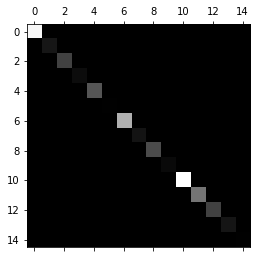

In [78]:
plt.matshow(confusion_dt, cmap = plt.cm.gray)
plt.show()

In [79]:
sum_of_row = confusion_dt.sum(axis = 1, keepdims = True)
norm_conf_dt = confusion_dt / sum_of_row

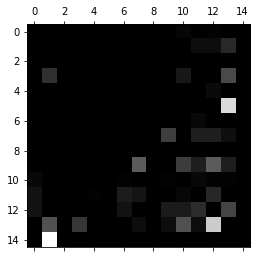

In [80]:
np.fill_diagonal(norm_conf_dt, 0)
plt.matshow(norm_conf_dt, cmap = plt.cm.gray)
plt.show()

In [81]:
precision_score(y_train, y_train_predict_dt, average = 'weighted')

0.9957640799503777

In [82]:
recall_score(y_train, y_train_predict_dt, average = 'weighted')

0.9957648653227172

In [83]:
f1_score(y_train, y_train_predict_dt, average = 'weighted')

0.9957630821042494

In [84]:
dt_predictions = dt_clf.predict(x_test) #predict how the classes from our test set
dt_predictions

array([9., 7., 7., ..., 0., 0., 6.])

In [85]:
print(accuracy_score(y_test, dt_predictions)) #88.5% accurate on our test set!!!!

0.9966965949517195


# Since the Decision Tree seems to be overfitting, lets try the Random Forest

In [86]:
random_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)

In [87]:
random_clf.fit(x_train, y_train)
random_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [88]:
random_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

In [89]:
cross_val_score(random_clf, x_train, y_train, cv = 3, scoring = "accuracy")

array([0.68218482, 0.67426793, 0.68645145])

In [90]:
y_train_predict_random = cross_val_predict(random_clf, x_train, y_train, cv = 3)
y_train_predict_random

array([ 0.,  6., 10., ...,  6., 10.,  0.])

In [91]:
confusion_random = confusion_matrix(y_train, y_train_predict_random)
confusion_random

array([[8858,    0,    1,    0,    4,    0,  606,    0,   45,    0,   57,
         314,    3,    0,    0],
       [ 261,    0,    0,    0,   14,    0,  336,    0,  111,    0,   35,
         101,   29,    0,    0],
       [ 458,    0,   62,    0,    0,    0, 1795,    0,    6,    0,    0,
         286,   56,    0,    0],
       [ 128,    0,    0,    0,    2,    0,  342,    0,    3,    0,   12,
           8,    2,    0,    0],
       [  23,    0,    0,    0, 2311,    0,  248,    0,   28,    0,  711,
          92,    7,    0,    0],
       [   6,    0,    0,    0,    0,    0,   38,    0,    3,    0,    1,
           6,    2,    0,    0],
       [ 249,    0,    0,    0,    0,    0, 6291,    0,   12,    0,  120,
         336,   32,    0,    0],
       [  55,    0,    0,    0,   82,    0,   60,    0,   79,    0,   19,
         294,  194,    0,    0],
       [ 142,    0,    0,    0,    8,    0,    9,    0, 2247,    0,  221,
         296,   86,    0,    0],
       [  28,    0,    0,    0,    9,

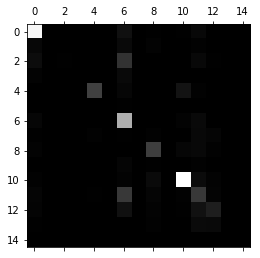

In [92]:
plt.matshow(confusion_random, cmap = plt.cm.gray)
plt.show()

In [93]:
sum_of_row_rf = confusion_random.sum(axis = 1, keepdims = True)
norm_conf_rf = confusion_random / sum_of_row_rf

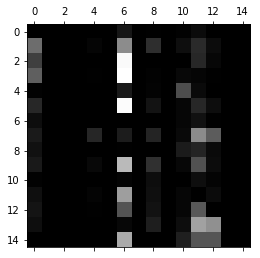

In [94]:
np.fill_diagonal(norm_conf_rf, 0)
plt.matshow(norm_conf_rf, cmap = plt.cm.gray)
plt.show()

In [95]:
precision_score(y_train, y_train_predict_random, average = 'weighted')

/home/shelob/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6689454058658165

In [96]:
recall_score(y_train, y_train_predict_random, average = 'weighted')

0.6786168050143995

In [97]:
f1_score(y_train, y_train_predict_random, average = 'weighted')

/home/shelob/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6371794363498166

In [98]:
random_predictions = random_clf.predict(x_test) #predict how the classes from our test set
random_predictions

array([11., 12., 11., ...,  0.,  0., 10.])

In [99]:
print(accuracy_score(y_test, random_predictions)) 

0.687192952735897


In [100]:
random_clf.feature_importances_

array([0.03384489, 0.04686343, 0.31961532, 0.00941853, 0.01463126,
       0.05934385, 0.00990571, 0.02156607, 0.04646138, 0.01346154,
       0.00490238, 0.01076022, 0.0159562 , 0.00744321, 0.02236991,
       0.00780968, 0.02036183, 0.02626928, 0.0096364 , 0.00573426,
       0.07676956, 0.0310655 , 0.01254956, 0.02359134, 0.00265223,
       0.00949397, 0.01056774, 0.04552077, 0.02173222, 0.05970175])

In [101]:
for name, score in zip(list(x_train), random_clf.feature_importances_):
    print(name, score) # remember these are percents, so multiply by 100

funded_amount 0.03384489499891319
loan_amount 0.04686343384075643
activity 0.31961531590163356
country_x 0.00941852567091663
region 0.014631261776791391
term_in_months 0.05934384973702515
lender_count 0.009905711068367158
borrower_genders 0.021566068865712516
repayment_interval 0.04646138129392819
MPI 0.013461540946628011
lat 0.004902384364581399
lon 0.010760216215601269
Population 0.015956202488758172
Area (sq. mi.) 0.007443211745769635
Pop. Density (per sq. mi.) 0.02236991139656031
Coastline (coast/area ratio) 0.007809678490398495
Net migration 0.020361832152689864
Infant mortality (per 1000 births) 0.02626928385906249
GDP ($ per capita) 0.009636399895381705
Literacy (%) 0.005734257740990694
Phones (per 1000) 0.07676956075006128
Arable (%) 0.031065495441402566
Crops (%) 0.012549562898160518
Other (%) 0.02359134218835985
Climate 0.002652228580608095
Birthrate 0.009493972500521147
Deathrate 0.010567736320978353
Agriculture 0.04552076899337453
Industry 0.021732220548638364
Service 0.059